# Capstone2: Final Project Report- West Nile Virus (WNV) Prediction

# A. Problem Identification

### West nile virus (WNV) spread through infected mosquitos, which are very deadly (~ 20% fatal rate). The task is to predict when and where different species of mosquitos will test positive for West Nile virus in the city of Chicago. An accurate method/model of such prediction will help authorities to mitigate the risk that can be caused by this deadly virus.

# B. Data Collection, Organization, and Definitions

#### The next step is to import the datasets required to solve the specific problem. Here, out of several available datasets, we need train data "train.csv" and weather data "weather.csv". Next, we merge those two datasets, clean it, organize it, and know what each features represent. Before this, necessary libraries should be imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
train = pd.read_csv('../input/train.csv')
weather = pd.read_csv('../input/weather.csv')
train['Date'] = pd.to_datetime(train['Date'])
weather['Date'] = pd.to_datetime(weather['Date'])
df_train = pd.merge(train, weather, on='Date', how='inner')
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
3,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5


In [2]:
df_train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Station', 'Tmax', 'Tmin', 'Tavg',
       'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset',
       'CodeSum', 'Depth', 'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

#### The features are straightforward to understand. Features basically includes data, address with block & street number, trap that contain maximum of 50 mosquitos, latitude and longitude of the location when mosquitos were reported, NumMosquitos (total mosquitos present). Also, we have different features related to weather condition where mosquitos were reported for example maximum temperature is denoted by 'Tmax' and so on.

# C. Exploratory Data Analysis

In [3]:
##Keep features that are important
df_train=df_train[['Date', 'Species','Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent', 'Tmax', 'Tmin', 'Tavg',
 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'AvgSpeed' ]]

In [4]:
##Convert features containing numbers into numeric format
df_train['Tavg'] = pd.to_numeric(df_train['Tavg'], errors='coerce')
df_train['PrecipTotal'] = pd.to_numeric(df_train['PrecipTotal'], errors='coerce')
df_train['StnPressure'] = pd.to_numeric(df_train['StnPressure'], errors='coerce')
df_train['SeaLevel'] = pd.to_numeric(df_train['SeaLevel'], errors='coerce')
df_train['AvgSpeed'] = pd.to_numeric(df_train['AvgSpeed'], errors='coerce')
df_train['WnvPresent'] = pd.to_numeric(df_train['WnvPresent'], errors='coerce')

In [5]:
## see the counts of each category of target variable
print(df_train['WnvPresent'].value_counts()[0])
print(df_train['WnvPresent'].value_counts()[1])

19910
1102


In [6]:
## Groupby columns
Train = df_train.groupby(['Latitude', 'Longitude', 'Species', 'Date'], as_index=False).agg({
    'NumMosquitos': 'sum',
    'Tmax': 'mean',
    'Tmin': 'mean',
    'Tavg': 'mean',
    'PrecipTotal': 'mean',
    'StnPressure': 'mean',
    'SeaLevel': 'mean',
    'AvgSpeed': 'mean',
    'WnvPresent': 'mean',
}).set_index(['Latitude', 'Longitude'])

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'NumMosquitos'}>,
        <Axes: title={'center': 'Tmax'}>],
       [<Axes: title={'center': 'Tmin'}>,
        <Axes: title={'center': 'Tavg'}>,
        <Axes: title={'center': 'PrecipTotal'}>],
       [<Axes: title={'center': 'StnPressure'}>,
        <Axes: title={'center': 'SeaLevel'}>,
        <Axes: title={'center': 'AvgSpeed'}>],
       [<Axes: title={'center': 'WnvPresent'}>, <Axes: >, <Axes: >]],
      dtype=object)

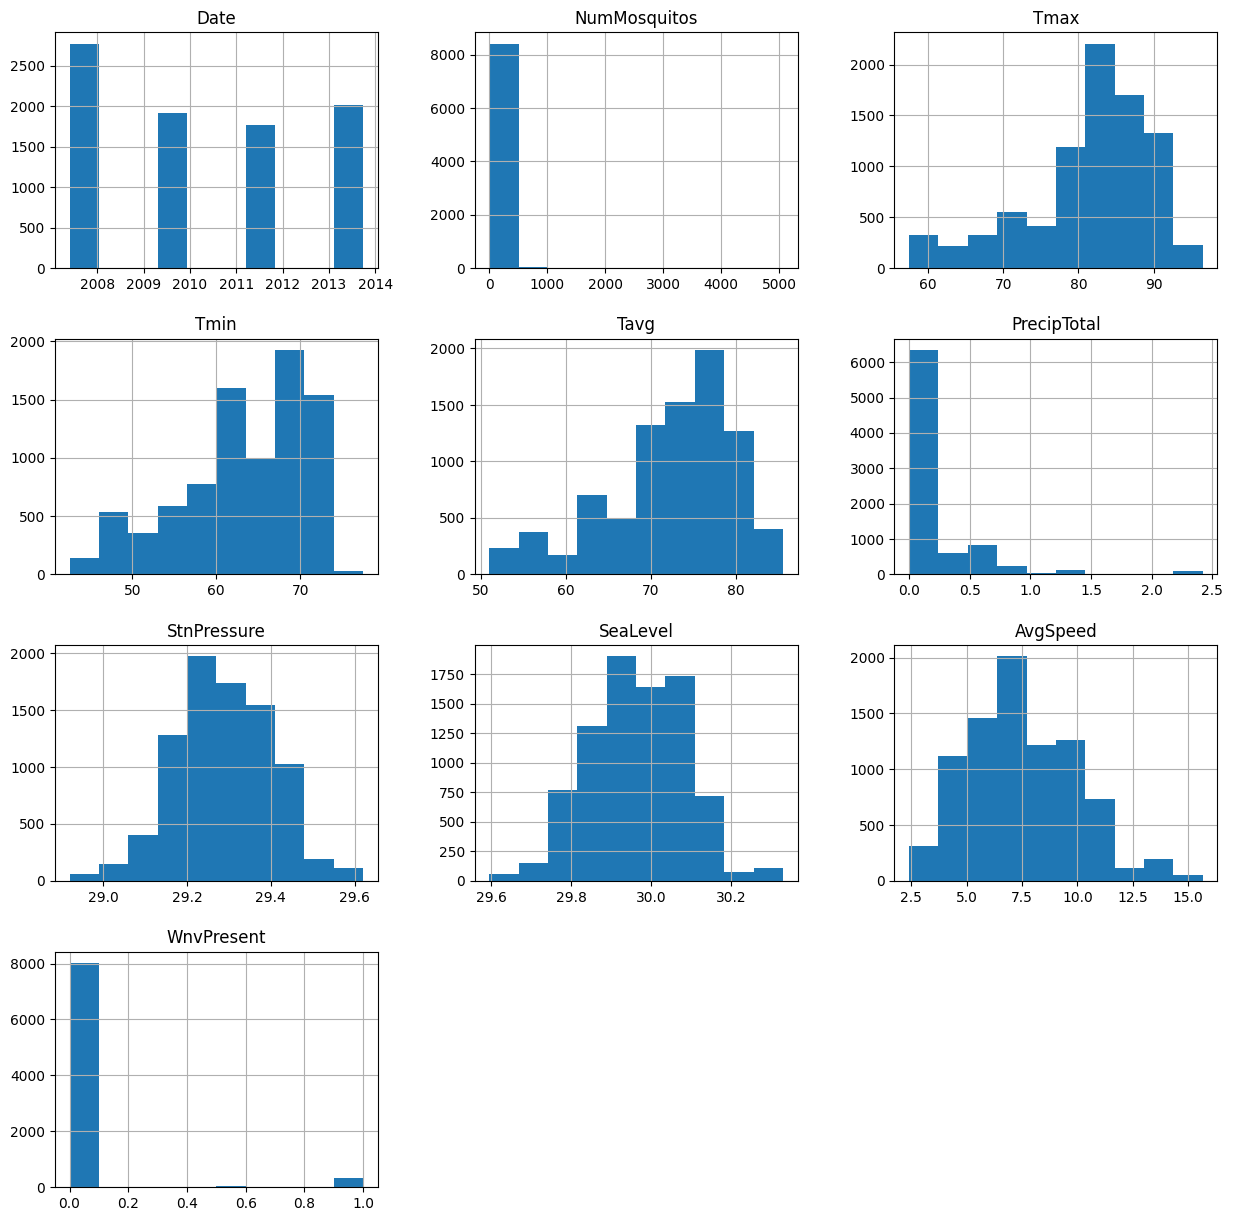

In [7]:
Train.hist(figsize=(15,15))

### Looks like Data is almost clean now and ready to be analyzed. Next step is feature engineering see relation between features to know more about our data. The column "WnvPresent" should be our target column, which says whether the virus is present in the mosquito or not.

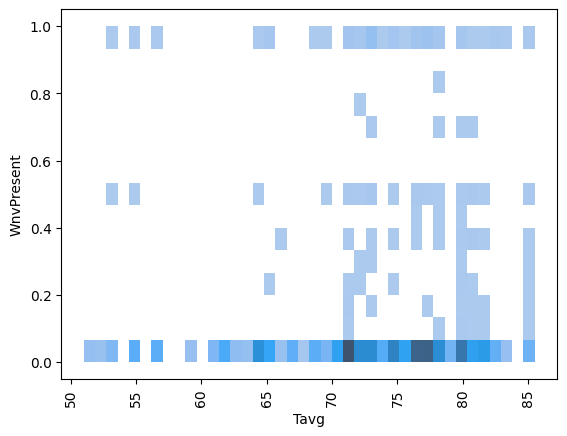

In [8]:
#See the relation between average temperature and the target column WnvPresent
sns.histplot(x='Tavg', y='WnvPresent', data=Train)
plt.xticks(rotation=90)
plt.show()

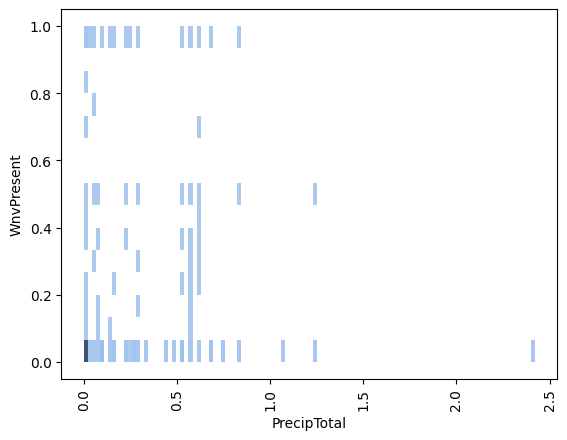

In [9]:
#See the relation between total precipitation reported in the particular location and the target column WnvPresent
Train.reset_index(inplace=True) 
sns.histplot(x='PrecipTotal', y='WnvPresent', data=Train)
plt.xticks(rotation=90)
plt.show()

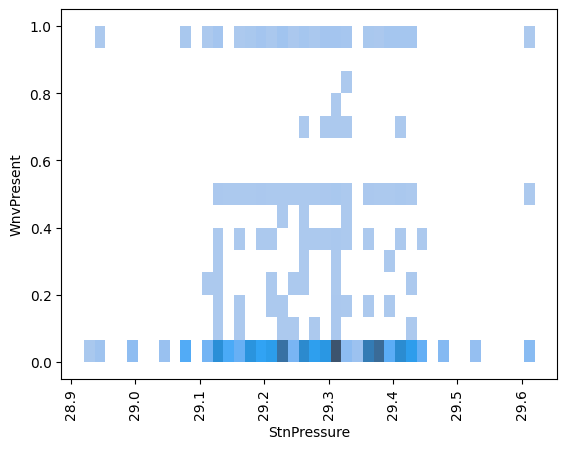

In [10]:
#See the relation between atmospheric pressure at the location and the WnvPresent
sns.histplot(x='StnPressure', y='WnvPresent', data=Train)
plt.xticks(rotation=90)
plt.show()

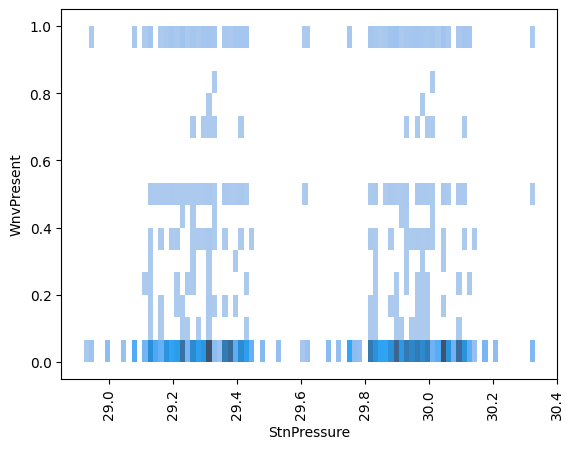

In [11]:
#See the relation between sealevel (height from sealevel) of the location and the WnvPresent
sns.histplot(x='StnPressure', y='WnvPresent', data=Train)
sns.histplot(x='SeaLevel', y='WnvPresent', data=Train)
plt.xticks(rotation=90)
plt.show()

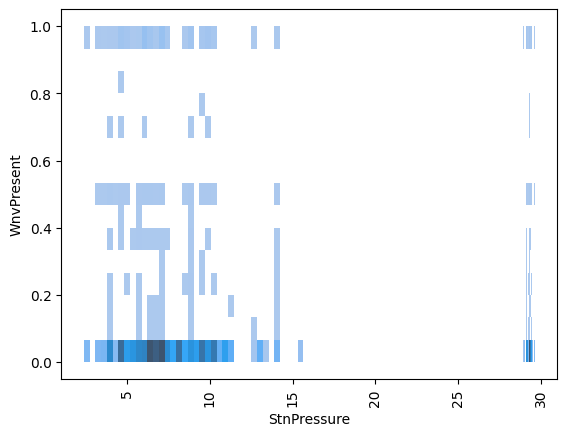

In [12]:
#See the relation between average wind speed at the location and the WnvPresent
sns.histplot(x='StnPressure', y='WnvPresent', data=Train)
sns.histplot(x='AvgSpeed', y='WnvPresent', data=Train)
plt.xticks(rotation=90)
plt.show()

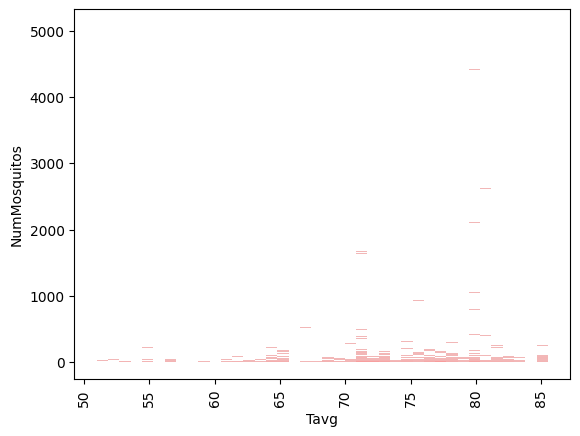

In [13]:
#See the relation between average temperature at the location and the number of mosquitos present at the same location
sns.histplot(x='Tavg', y='NumMosquitos', data=Train, color='red', alpha=1)
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'CULEX PIPIENS'),
  Text(1, 0, 'CULEX PIPIENS/RESTUANS'),
  Text(2, 0, 'CULEX RESTUANS'),
  Text(3, 0, 'CULEX SALINARIUS'),
  Text(4, 0, 'CULEX TERRITANS'),
  Text(5, 0, 'CULEX TARSALIS'),
  Text(6, 0, 'CULEX ERRATICUS')])

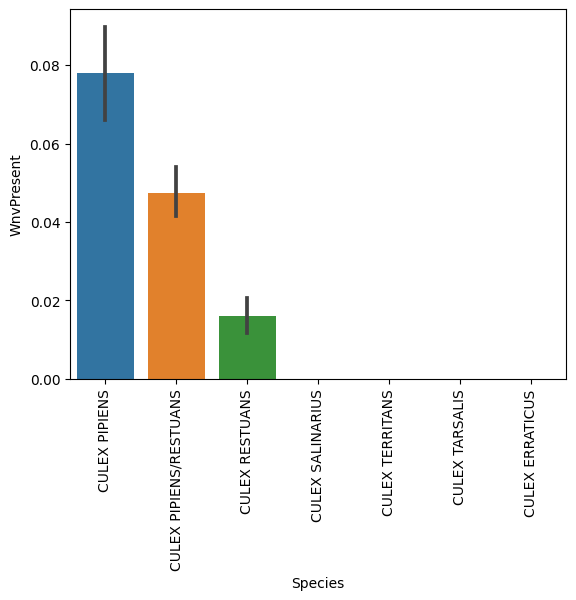

In [14]:
#See the relation between type of species of the mosquito present at the location and Wnv virus present in it.
sns.barplot(x='Species', y='WnvPresent', data=Train)
plt.xticks(rotation=90)

In [15]:
# Only keep those species that can contain WNV virus
Train = Train[Train['Species'].isin(['CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS'])]

# D. Pre-processing and Training Data Development

In [16]:
## create more features from the date
#create a new column 'DayOfWeek'(with values 0, 1, 2, 3, 4, 5, 6) where 0 is Monday and 6 is Sunday.
Train['DayOfWeek'] = Train['Date'].dt.dayofweek
## create another column 'week number'
Train['WeekNumber'] = Train['Date'].dt.week
##create a new column 'IsWeekend',  where 1 represents weekend (Saturday or Sunday
#and 0 represents weekday (Monday to Friday)
Train['IsWeekend'] = Train['Date'].dt.dayofweek // 5
## Add a new column 'Quarter' representing the quarter of the year
Train['Quarter'] = Train['Date'].dt.quarter

/var/folders/6q/pwz4vcc955s4cn61rqrhsgp80000gn/T/ipykernel_23922/1400209835.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Train['WeekNumber'] = Train['Date'].dt.week


In [17]:
## create a new column Season
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

Train['Season'] = Train['Date'].dt.month.apply(get_season)

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

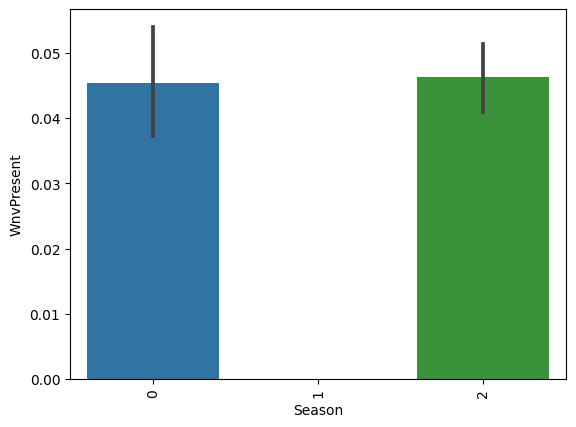

In [18]:
## next convert categorical features into numeric. 
# first do Labelencoder for Season column. 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Train['Season'] = label_encoder.fit_transform(Train['Season'])
## 'Fall' is represented as 0, 'Spring' as 1, and 'Summer' as 2
sns.barplot(x='Season', y='WnvPresent', data=Train)
plt.xticks(rotation=90)

In [19]:
## Perform one-hot encoding for another categorical column called 'Species'
Train = pd.get_dummies(Train, columns=['Species'], prefix=['Species'])

In [20]:
## We can drop 'Date' column as we already have different columns obtained from date
Train.drop(columns=['Date'], inplace=True)

In [21]:
## Again check is data contain any missing and null values and fill with any method if necessary.
Train.isnull().any()

Latitude                          False
Longitude                         False
NumMosquitos                      False
Tmax                              False
Tmin                              False
Tavg                              False
PrecipTotal                        True
StnPressure                       False
SeaLevel                          False
AvgSpeed                          False
WnvPresent                        False
DayOfWeek                         False
WeekNumber                        False
IsWeekend                         False
Quarter                           False
Season                            False
Species_CULEX PIPIENS             False
Species_CULEX PIPIENS/RESTUANS    False
Species_CULEX RESTUANS            False
dtype: bool

In [22]:
Train['PrecipTotal'].fillna(Train['PrecipTotal'].mean(), inplace=True)

In [23]:
## Since we previously groupby some columns using sum or mean method, our
# target column might no longer be discrete. If it is so, convert continuous to discrete.
threshold = 0.5
Train['WnvPresent'] = Train['WnvPresent'].apply(lambda x: 1 if x >= threshold else 0)

In [24]:
## save the cleaned data into another csv file for future use
Train.to_csv('CleanData_ForModeling.csv', index=False)

# E. Modeling

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import auc, roc_curve, roc_auc_score
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_csv('CleanData_ForModeling.csv')
df.head()

,Latitude,Longitude,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent,DayOfWeek,WeekNumber,IsWeekend,Quarter,Season,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS
0,41.644612,-87.604498,12,91.0,71.5,81.5,0.000,29.285,29.960,6.55,0,3,31,0,3,2,1,0,0
1,41.644612,-87.604498,52,91.5,72.5,82.5,0.685,29.085,29.750,8.90,0,1,32,0,3,2,1,0,0
2,41.644612,-87.604498,30,80.5,71.5,76.5,0.530,29.200,29.880,6.45,0,2,33,0,3,2,1,0,0
3,41.644612,-87.604498,4,90.0,69.5,80.0,0.625,29.260,29.935,8.95,0,2,34,0,3,2,1,0,0
4,41.644612,-87.604498,4,80.5,69.0,75.0,0.220,29.135,29.815,7.20,0,4,34,0,3,2,1,0,0


In [27]:
print(df['WnvPresent'].value_counts()[0])
print(df['WnvPresent'].value_counts()[1])

7782
387


### This clearly shows that the target class is very imbalence. So we want to use combination of oversampling technique and undersampling technique to balance them.

In [28]:
!pip install imbalanced-learn

In [29]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Define the SMOTE and RandomUnderSampler techniques
smote = SMOTE(sampling_strategy='minority', random_state=42)
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# Create a pipeline with SMOTE and RandomUnderSampler
sampling_pipeline = Pipeline([
    ('smote', smote),
    ('rus', rus)
])

# Apply the sampling techniques to balance the dataset
X = df.drop(columns=['WnvPresent'])
y = df['WnvPresent']
X_resampled, y_resampled = sampling_pipeline.fit_resample(X, y)
## Now split the final resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10894, 18)
(4670, 18)
(10894,)
(4670,)


### This is the classification problem of supervised learning. I will test following different models to this problem.

# 1. Logistic Regression

In [31]:
## load necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

In [32]:
## Try to search for a good C parameter
C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range


table2 = pd.DataFrame(columns = ['C_parameter','ROC_AUC_Score'])
table2['C_parameter'] = C_param_range
j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
    Logreg.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = Logreg.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    
    
    y_scores_lr = Logreg.predict_proba(X_test)[:,1]
    table2.iloc[j,1] = roc_auc_score(y_test,y_scores_lr)
    j += 1
    
print(table)  
print(table2)

   C_parameter  Accuracy
0        0.001  0.731263
1        0.010  0.768522
2        0.100   0.77045
3        1.000  0.759957
4       10.000  0.765953
5      100.000  0.768522
   C_parameter ROC_AUC_Score
0        0.001      0.807105
1        0.010      0.867768
2        0.100       0.86699
3        1.000      0.858335
4       10.000       0.86311
5      100.000      0.858776


## Here ROC AUC SCORE is our main metric to compare different models.

In [33]:
## Also obtain confusion matrix ROC AUC score from the optimal C parameter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve, roc_auc_score
Logreg = LogisticRegression(penalty = 'l2', C = 0.01,random_state = 40)
Logreg.fit(X_train,y_train)
y_pred_lr = Logreg.predict(X_test)
y_scores_lr = Logreg.predict_proba(X_test)
y_scores_lr = y_scores_lr[:,1]
auroc_lr = roc_auc_score(y_test, y_scores_lr)
print(auroc_lr)
cnf_matrix = confusion_matrix(y_test, y_pred_lr)
print(cnf_matrix)

0.8677681584739545
[[1781  569]
 [ 512 1808]]


### This shows that C parameter value of 0.01 and 0.1 are giving better ROC AUC score.

In [34]:
## We also want to obtain cross validation train score and train score and compare it for different models
from sklearn.model_selection import cross_val_score
cv_scores_test= cross_val_score(Logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.83009905 0.84088866 0.83274486 0.8273661  0.84895451]
Mean cross validation test score: 0.8360106382978723
Mean cross validation train score: 0.8760870691903841
Standard deviation in cv test scores: 0.007895304703304268


# 2. K-Nearest Neighbor(KNN)

In [35]:
## load necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [36]:
## This time see how KKN performs for different number of neighbors
N_neighbors_range = [3,5,10,25,50,100]

table = pd.DataFrame(columns = ['N_neighbors','Accuracy'])
table['N_neighbors'] = N_neighbors_range

table2 = pd.DataFrame(columns = ['N_neighbors','ROC_AUC_Score'])
table2['N_neighbors'] = N_neighbors_range

j = 0
for i in N_neighbors_range:
    
    # Apply logistic regression model to training data
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    
    # Predict using model
    pred_knn = knn.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,pred_knn)
    y_scores_knn = knn.predict_proba(X_test)[:,1]
#    auroc_lr = roc_auc_score(y_test, y_scores_lr)
    table2.iloc[j,1] = roc_auc_score(y_test,y_scores_knn)
    j += 1
    
print(table)
print(table2)

   N_neighbors  Accuracy
0            3  0.921199
1            5  0.904069
2           10  0.888865
3           25  0.847323
4           50  0.824411
5          100  0.807709
   N_neighbors ROC_AUC_Score
0            3      0.961649
1            5      0.962593
2           10      0.953637
3           25      0.931565
4           50      0.916359
5          100      0.894686


### Looks like Accuracy is good for n_neighbors=5. Neither too large not too small n_neighbors is good.

In [37]:
## Obtain ROC AUC score for n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn= knn.predict(X_test)
print(classification_report(y_test, pred_knn))
Accuracy_knn=knn.score(X_test,y_test)
y_scores_knn = knn.predict_proba(X_test)[:,1]
auroc_knn = roc_auc_score(y_test, y_scores_knn)
print(auroc_knn)
print(confusion_matrix(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90      2350
           1       0.86      0.96      0.91      2320

    accuracy                           0.90      4670
   macro avg       0.91      0.90      0.90      4670
weighted avg       0.91      0.90      0.90      4670

0.9625929933969185
[[1987  363]
 [  85 2235]]


In [38]:
##obtain cross validation train score and train score
from sklearn.model_selection import cross_val_score
cv_scores_test= cross_val_score(knn,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(knn,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_test_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_knn))

[0.91093635 0.93108263 0.92375275 0.92221203 0.93294433]
Mean cross validation test score: 0.9241856199559795
Mean cross validation train score: 0.9527821906708394
Standard deviation in cv test scores: 0.007796271869324786


# 3. Support Vector Machine (SVM)

In [39]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
from sklearn.model_selection import train_test_split
X = df.drop(columns=['WnvPresent'])
y = df['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
svm.fit(X_train, y_train)
pred_svm= svm.predict(X_test)
print(confusion_matrix(y_test, pred_svm))
Accuracy_svm=svm.score(X_test,y_test)
y_scores_svm = knn.predict_proba(X_test)[:,1]
auroc_svm = roc_auc_score(y_test, y_scores_svm)
print(auroc_svm)

[[2102  248]
 [ 639 1681]]
0.9625929933969185


In [40]:
##obtain cross validation train score and train score
from sklearn.model_selection import cross_val_score
cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_test_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_svm))

[0.89085657 0.90369589 0.87118947 0.88273569 0.8948872 ]
Mean cross validation test score: 0.8886729640498899
Mean cross validation train score: 0.8953735845308686
Standard deviation in cv test scores: 0.011045332480589722


# 4. Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
from sklearn.model_selection import train_test_split
X = df.drop(columns=['WnvPresent'])
y = df['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
rf.fit(X_train, y_train)
pred_rf= rf.predict(X_test)
#print(accuracy_score(y_test, pred_rf))
Accuracy_rf=rf.score(X_test,y_test)
#print(Accuracy_rf)
print(confusion_matrix(y_test, pred_rf))
y_scores_rf = rf.predict_proba(X_test)[:,1]
auroc_rf = roc_auc_score(y_test, y_scores_rf)
print(auroc_rf)

[[1989  361]
 [ 202 2118]]
0.9479153521643432


In [42]:
##obtain cross validation train score and train score
from sklearn.model_selection import cross_val_score
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_test_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_rf))

[0.94643709 0.94866104 0.94760409 0.94336253 0.95230191]
Mean cross validation test score: 0.9476733308877476
Mean cross validation train score: 0.9457199913417587
Standard deviation in cv test scores: 0.0029160045631184215


# 5. Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
X = df.drop(columns=['WnvPresent'])
y = df['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)
#print(accuracy_score(y_test, pred_gbc))
Accuracy_gbc=gbc.score(X_test,y_test)
#print(Accuracy_gbc)
print(confusion_matrix(y_test, pred_gbc))

y_scores_gbc = gbc.predict_proba(X_test)[:,1]
auroc_gbc = roc_auc_score(y_test, y_scores_gbc)
print(auroc_gbc)

[[2193  157]
 [ 156 2164]]
0.9835096294937637


In [44]:
## obtain cross validation train score and train score
from sklearn.model_selection import cross_val_score
cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_test_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_gbc))

[0.97949835 0.98114453 0.97981245 0.98028247 0.98151825]
Mean cross validation test score: 0.9804512105649303
Mean cross validation train score: 0.9810966330404302
Standard deviation in cv test scores: 0.000769896174384105


# 6. Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
X = df.drop(columns=['WnvPresent'])
y = df['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)
#print(accuracy_score(y_test, pred_nb))
Accuracy_nb=nb.score(X_test,y_test)
#print(Accuracy_nb)
print(confusion_matrix(y_test, pred_nb))

y_scores_nb = nb.predict_proba(X_test)[:,1]
auroc_nb = roc_auc_score(y_test, y_scores_nb)
print(auroc_nb)

[[1287 1063]
 [ 192 2128]]
0.8788367571533382


In [46]:
## obtain cross validation train score and train score
from sklearn.model_selection import cross_val_score
cv_scores_test= cross_val_score(nb,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(nb,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_nb_test= cv_scores_test.mean()
cv_scores_nb_train= cv_scores_train.mean()
cv_scores_std_test_nb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_nb_test))
print ('Mean cross validation train score: ' +str(cv_scores_nb_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_nb))

[0.87315205 0.88186904 0.87119406 0.86048239 0.88926999]
Mean cross validation test score: 0.8751935069699194
Mean cross validation train score: 0.8699778049219329
Standard deviation in cv test scores: 0.009790712059431786


# 7. XGBoost Model

In [47]:
!pip install xgboost

In [48]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop(columns=['WnvPresent'])
y = df['WnvPresent']
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
params = {
    'objective': 'binary:logistic', 
    'max_depth': 3,                  
    'learning_rate': 0.1,            
    'n_estimators': 100,             
    'eval_metric': 'logloss'        
}
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

xgb_model = xgb.train(params, dtrain, num_boost_round=100)

raw_scores = xgb_model.predict(dtest)

# Apply sigmoid function to get probabilities
probabilities = 1 / (1 + np.exp(-raw_scores))

auroc_xgb = roc_auc_score(y_test, probabilities)
print(auroc_xgb)

0.9826401320616287


# Comparison of Models
### Now is the time to compare all the models we tried above. We basically see ROC AUC score and also train and test score using cross validation. We finally plot scores obtained from different models as a function of those models

In [52]:
models = [ 'Logistic Regression','KNN', 'SVM', 'Random Forest','Gradient Boost', 'Naive Bayes']
models2 = [ 'Logistic Regression','KNN','SVM', 'Random Forest','Gradient Boost', 'Naive Bayes', 'XGBoost']
score_test= [  cv_scores_lr_test,cv_scores_knn_test,cv_scores_svm_test, cv_scores_rf_test,cv_scores_gbc_test,cv_scores_nb_test]
score_train= [  cv_scores_lr_train,cv_scores_knn_train,cv_scores_svm_train, cv_scores_rf_train,cv_scores_gbc_train,cv_scores_nb_train]

auroc_score = [auroc_lr, auroc_knn, auroc_svm, auroc_rf, auroc_gbc, auroc_nb, auroc_xgb]

score_tab_auroc = pd.DataFrame(list(zip(models2, auroc_score)), 
               columns =['Algorithm', 'ROC-AUC score']) 

score_tab = pd.DataFrame(list(zip(models, score_train, score_test)), 
               columns =['Algorithm','train score', 'test score' ]) 


print(score_tab)

print(score_tab_auroc)

             Algorithm  train score  test score
0  Logistic Regression     0.876087    0.836011
1                  KNN     0.952782    0.924186
2                  SVM     0.895374    0.888673
3        Random Forest     0.945720    0.947673
4       Gradient Boost     0.981097    0.980451
5          Naive Bayes     0.869978    0.875194
             Algorithm  ROC-AUC score
0  Logistic Regression       0.867768
1                  KNN       0.962593
2                  SVM       0.962593
3        Random Forest       0.947915
4       Gradient Boost       0.983510
5          Naive Bayes       0.878837
6              XGBoost       0.982640


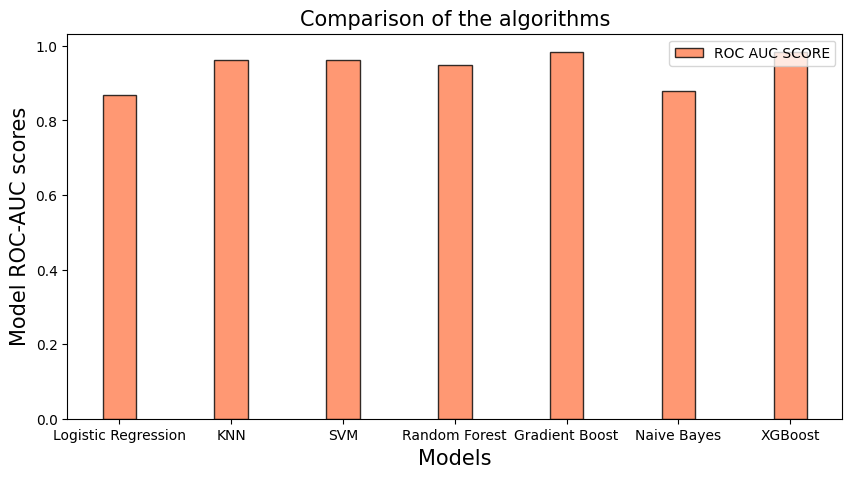

In [53]:
plt.figure(figsize=(10,5))
plt.bar(models2,auroc_score,color='coral',alpha=0.8,label='ROC AUC SCORE',edgecolor='k',width=0.3)
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
plt.legend()
plt.show()

### Gradient Boost model turned out to be the  best model with ROC AUC score of 0.983510.  This model also has larger train score, test score and accuracy score. XGBoost turned out to be the second preferred model here.  To see how each models perform, following visualizations will be important

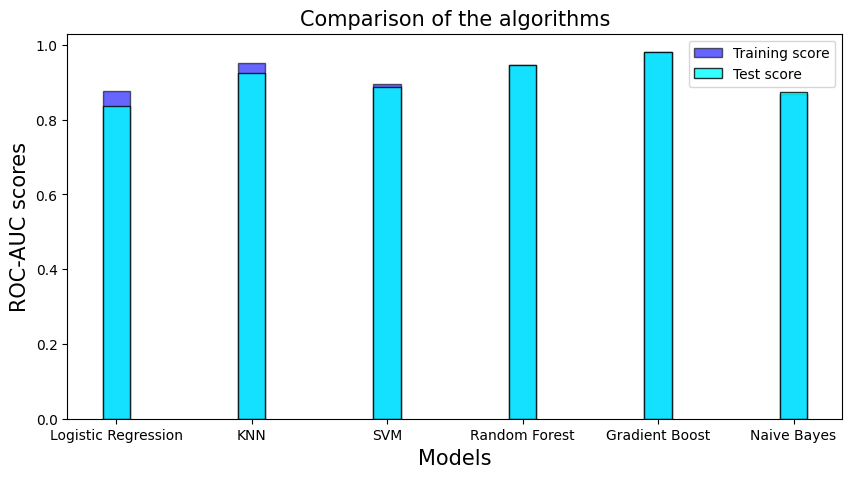

In [55]:
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
plt.bar(models,score_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
plt.bar(models,score_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
#plt.xticks([1, 2,3,4,5, 6], models)
plt.legend()
plt.savefig("27.png")
plt.show()

#  Gradient Boosting Models is performing better. Next, I will do Hyperparameter Tuning with Gradient Boosting.

## Parameter Tuning

In [56]:
GB = GradientBoostingClassifier()
gb_param = {
        'loss' : ["deviance"],
        'n_estimators' : [100,200,300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

gsGB = GridSearchCV(GB, param_grid = gb_param, cv=3, scoring="accuracy", verbose = 1)
gsGB.fit(X_train,y_train)
print(gsGB.best_estimator_)
print(gsGB.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
GradientBoostingClassifier(max_depth=8, max_features=0.3, min_samples_leaf=100,
                           n_estimators=300)
0.961997580792903


In [ ]:
## Use this optimal parameterand fit the gradient boosting model

## Fitting the model with optimal parameters

In [59]:
GB = GradientBoostingClassifier(max_depth=8, max_features=0.3, min_samples_leaf=100,
                           n_estimators=300)
GB.fit(X_train, y_train)
y_predictions_GB = GB.predict(X_test)
acc_GB = accuracy_score(y_test, y_predictions_GB)
cv_GB = cross_val_score(GB, X_test, y_test,scoring='roc_auc').mean()
print(acc_GB)
print(cv_GB)

y_scores_GB = GB.predict_proba(X_test)[:,1]
auroc_GB = roc_auc_score(y_test, y_scores_GB)
print(auroc_GB)

0.971948608137045
0.9890599779897287
0.9963042920029347


### Hence performing hyperparameter tuning ROC AUC score increased from 0.983510 to 0.9963860968451944.

### ROC Curve

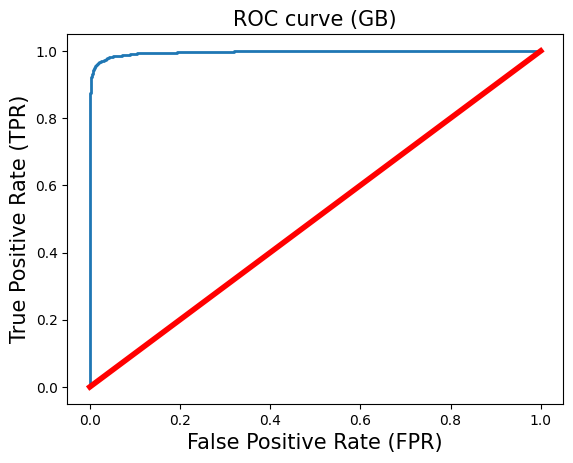

<Figure size 1000x500 with 0 Axes>

In [63]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_GB)

plt.plot(false_positive_rate, true_positive_rate, linewidth=2)
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.xlabel('False Positive Rate (FPR)', fontsize=15)
plt.ylabel('True Positive Rate (TPR)', fontsize=15)
plt.title('ROC curve (GB)',fontsize=15)

plt.figure(figsize=(10, 5))
plt.savefig("31.png")
plt.show()

## Extracting Feature Importances

In [ ]:
## Finally, we want to find out which features are most important in our problem.

In [64]:
df.head()

,Latitude,Longitude,NumMosquitos,Tmax,Tmin,Tavg,PrecipTotal,StnPressure,SeaLevel,AvgSpeed,WnvPresent,DayOfWeek,WeekNumber,IsWeekend,Quarter,Season,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS
0,41.644612,-87.604498,12,91.0,71.5,81.5,0.000,29.285,29.960,6.55,0,3,31,0,3,2,1,0,0
1,41.644612,-87.604498,52,91.5,72.5,82.5,0.685,29.085,29.750,8.90,0,1,32,0,3,2,1,0,0
2,41.644612,-87.604498,30,80.5,71.5,76.5,0.530,29.200,29.880,6.45,0,2,33,0,3,2,1,0,0
3,41.644612,-87.604498,4,90.0,69.5,80.0,0.625,29.260,29.935,8.95,0,2,34,0,3,2,1,0,0
4,41.644612,-87.604498,4,80.5,69.0,75.0,0.220,29.135,29.815,7.20,0,4,34,0,3,2,1,0,0


                          Features  Importance scores
0                         Latitude           0.000000
1                        Longitude           0.006525
2                     NumMosquitos           0.022852
3                             Tmax           0.023108
4                             Tmin           0.026370
5                             Tavg           0.026895
6                      PrecipTotal           0.031730
7                      StnPressure           0.032912
8                         SeaLevel           0.036777
9                         AvgSpeed           0.037376
10                       DayOfWeek           0.038688
11                      WeekNumber           0.039798
12                       IsWeekend           0.050020
13                         Quarter           0.051805
14                          Season           0.060029
15           Species_CULEX PIPIENS           0.100935
16  Species_CULEX PIPIENS/RESTUANS           0.173594
17          Species_CULEX RE

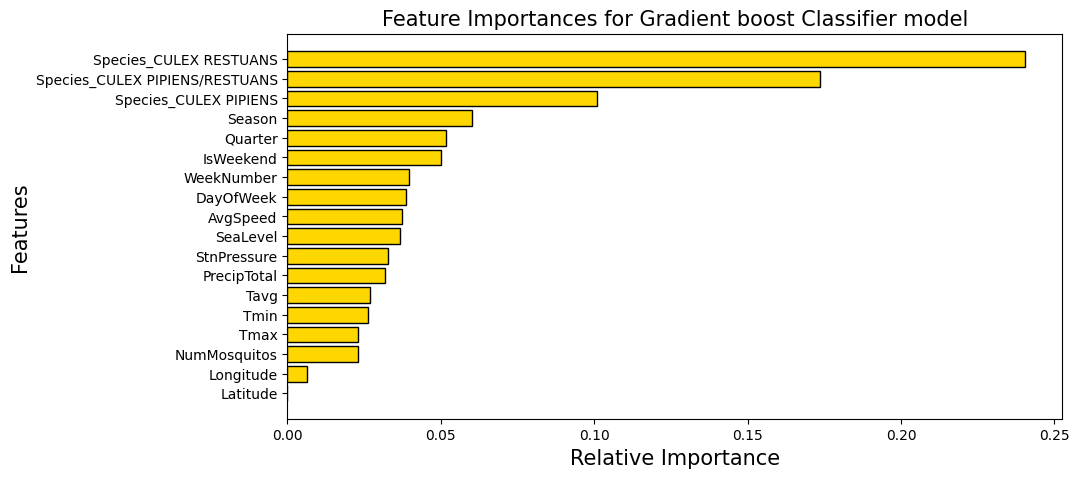

In [68]:
features = X
importances = list(GB.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#visually:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
_=plt.barh(index,imp, align='center',color='gold',edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Gradient boost Classifier model',fontsize=15)
plt.savefig("29.png")
plt.show()

### This shows that species of mosquitos are the most important features, and seasons, and then different weather conditions

## Conclusions

##### I successfully solved this problem. Now, I will briefly discuss important steps sequentially and make a conclusion.
West nile virus (WNV) spreads through infected mosquitos and they are very deadly. The problem was to predict when and where different species of mosquitos will test positive for West Nile virus in the city of Chicago. An accurate method/model of such prediction will help authorities to mitigate the risk that can be caused by this deadly virus.

To solve this problem, I performed following steps;
1. I did import necessary libraries needed. Then I imported the required datasets (train.csv file and weather.csv file). I merged those dataset on a common column called 'Date' and started the data wrangling step. I used different methods to explore the data, like df.info(), df.describe, etc. 
2. I checked if there were any missing values, duplicated values, outliers, redundant values, and more. Then, I tried cleaning data, retained only important features, find out the target features. I visualize the data using histogram, barplot and understand relationship between different features and relationship of those features with the target feature.
3. Then comes the real feature engineering steps. To really solve the underlying problem, I had to make sure I have correct and enough features that is needed. I noticed the urgency of few more features like day of week, weak number, season, etc, and so I created those features. from the datetime column. I used groupby method to group columns. I make sure all numerical features are in numeric format. To convert non-numeric columns to numeric format, I used LabelEncoder method (for 'Season' column) and One-hot encoder method (for 'species' column). I double checked again to see if there were any missing values and other unwanted data in the dataframe. Finally, I saved the cleaned data in a differnet csv file for modeling.
4. This was another very important step that involed checking different machine learning models. I first checked number of positive and negative classes of the target feature and found that they were imbalanced. I resampled them and balenced them and used scikit-learn's train_test_split method to split the data into train and test data sets. I tried 7 different models from logistic regression, K-nearest neighbor (KNN) classifier, random forest classifier, support vector machine (SVM), Gradient Boosting, Naive Bayes, and XgBoost. For each models, I imported different libraries needed, trained the model, predicted the output, tested the accuracy of the method and evaluated the scores such as ROC-AUC score and cross validation train and test scores. I also visualized the confusion matrix of each methods. 
5. Next, I compared different models based on those metrics, basically focusing on ROC-AUC score and visualize the performance using barplot. It turns out that Gradient Boosing stand out among all the models.

6. Next, I did hyperparameter tuning for my best model, 'Gradient Boosting' and fitted the model with optimum paramters and calculated the AUC ROC score. Interesting, performance score increased after tuning the parameters. I also plotted the ROC curve between true positive rate as a function of false positive rate.

7. Finally, to sense the most important features in the problem of predicting WNV virus, I did feature important test. I plotted different features with their relative importance value. It was good to know that species of mosquitos were the most important features, then seasons of a year, and then different weather conditions. The 'Latitude' and 'Longitude' columns that I had included in the data were least important and felt that I might have dropped them earlier.